# 1.) Import the Credit Card Fraud Data From CCLE

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_W/week3/fraudTest.csv")

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [7]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [8]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [9]:
type(df_select["trans_date_trans_time"][0])

str

In [10]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-10-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [11]:
dir(df_select["trans_date_trans_time"][0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [12]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-12-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [13]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [14]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# XXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS

In [15]:
# resample_X = X
# resample_y = y

In [16]:
ros = RandomOverSampler(random_state = 0) 
X_resampled, y_resampled = ros.fit_resample(X, y)

# 5.) Train a Logistic regression.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [18]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [19]:
y_pred = log_reg.predict(X_test)

In [20]:
# Get the predicted probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

In [21]:
print('Accuracy:', log_reg.score(X_test, y_test))

Accuracy: 0.7844104231585602


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [22]:
from sklearn.metrics import roc_curve

# Generate some example data
y_true = y_test
y_scores = y_scores

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Find the threshold for FPR of 5%
target_fpr = 0.05
idx = (fpr < target_fpr).argmax()
threshold_value = thresholds[idx]
print(threshold_value)


2.0


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [23]:
df_temp = df_select.copy()

In [24]:
y_pred_proba_or = log_reg.predict_proba(X)[:, 1] 
y_pred_or = (y_pred_proba_or > 0.63).astype(int)

In [25]:
df_temp["pred"] = y_pred_or

In [26]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [27]:
df_temp.head()
# Which combinations of "pred" and "if_fraud" do we profit .02*amt, which cases do 
# we lose -amt??

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


In [28]:
# The answer should be one single number

In [29]:
df_temp_t = df_temp[df_temp["is_fraud"] == df_temp["pred"]].copy() 
df_temp_f = df_temp[df_temp["is_fraud"] != df_temp["pred"]].copy()
df_temp_t['Profit'] = 0.2 * df_temp_t["amt"] 
df_temp_f['Profit'] = -1 * df_temp_f["amt"] 
profit = df_temp_t['Profit'].sum() + df_temp_f['Profit'].sum() 
profit

-4511031.085999997

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [33]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a logistic regression Lasso object
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model using the training data
log_reg_lasso.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

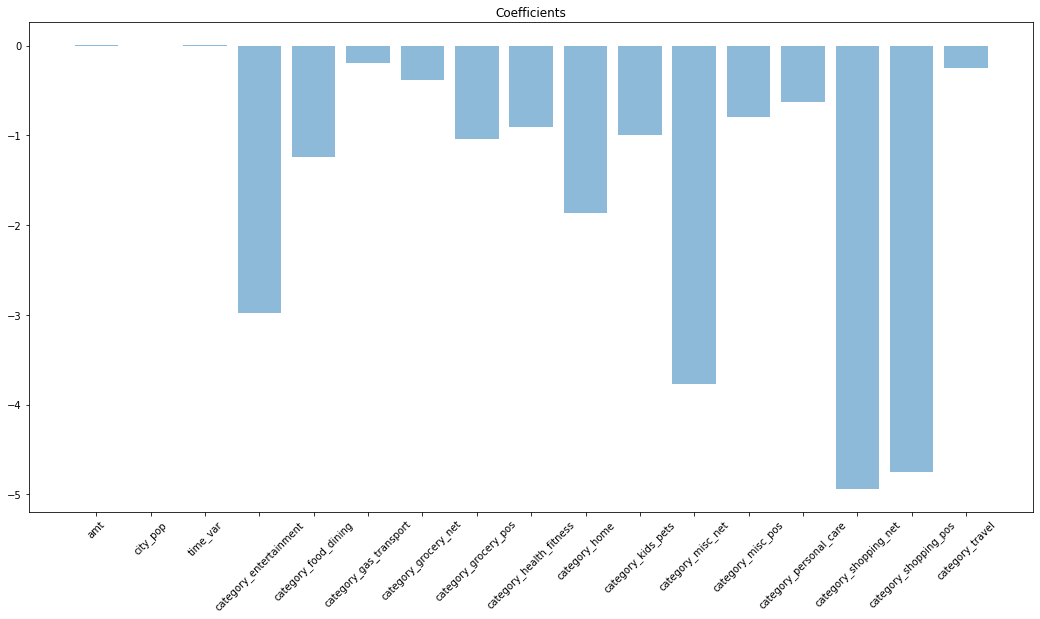

In [39]:
objects = list(X_train.columns)
plt.figure(figsize = (18, 9)) 
plt.bar(objects, log_reg_lasso.coef_[0], align='center', alpha = 0.5) 
plt.xticks(objects, rotation=45) 
plt.title('Coefficients') 
plt.show()

We should remove the three predictors 'amt', 'city_pop', 'time_var' because they are nearly zero.